<center>
<h1> Prueba Técnica Tusdatos.co </h1>
</cencter>

**Nombre Candidato:** Bryam Steve Pinilla Jurado (B.Sc Astronomy)

**E-mail:** bryam.pinilla@udea.edu.co

**Cargo:** Científico de Datos

**Fecha:** 22 de julio del 2022

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Realizo la carga de los datos, y procedemos a ver como esta conformado el dataset
df = pd.read_csv('Cruceros.csv')
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [30]:
# Ahora quiero ver las dimensiones de la matriz
df.shape

(158, 9)

In [31]:
# Continuo revisando el nombre de las columnas
print(df.columns)
# Seguidamente renombro las columnas por su nombre en minúscula para facilitar la escritura
df.rename(columns={'Ship_name':'ship_name','Cruise_line':'cruise_line','Age':'age','Tonnage':'tonnage'},inplace=True)

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')


El contexto de los datos es: Datos de algunos [cruseros](https://en.wikipedia.org/wiki/Cruise_ship) tomando en cuenta la definición de viaje placentero principalmente de vacaciones para personas. Se cuenta con las siguientes variables. 

- ship_name: Nombre del crusero.
- cruise_line: Tipo de crusero, es como el tipo de ticket en avión o clase del crusero por el cual se pago.
- age: Supongo que es la edad que lleva operando ese crusero en específico. Sin embargo, no se aclaran las unidades, años, supungo.
- [tonnage](https://en.wikipedia.org/wiki/Tonnage): En español Tonelaje, se refiere a la capacidad en carga que tiene el crucero. Normalmente se mide en unidades de volumen. Su uso normalmente se da en un contexto de carga de materiales o productos.
- passengers: Número de pasajeros.
- length: Longitud del barco. Sin unidades, buscando alguno representativo, lo más probables e que sea $\sim 10^{3}$ metros.
- cabings: Número de cabinas del crusero, son las habitaciones para los pasajeros.
- passenger_density: Densidad de pasajeros. Se desconoce a priori sus unidades. Pensaría algo como:
$$\text{passeger density} = \frac{\text{passengers}}{\text{Volumen especifico}}$$
donde el volumen estuviera relacionado de alguna manera con la variables *cabins*.
- [crew](https://es.wikipedia.org/wiki/Tripulaci%C3%B3n_(barcos)#:~:text=La%20tripulaci%C3%B3n%20de%20un%20barco,en%20departamentos%20seg%C3%BAn%20su%20funci%C3%B3n.): Tamaño de la tripulación, no son los pasajeros, son las personas encargadas a su maniobraje y servicio.

No se mucho de barcos.

<center>
<img src="https://cdn.20m.es/img2/recortes/2016/06/07/295227-944-531.jpg?v=20160607143123" height='500px'>
</center>

In [32]:
# Ahora quiero ver la info del dataset. 
# Esto permite observar si existen datos nulos, y el dtype cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ship_name          158 non-null    object 
 1   cruise_line        158 non-null    object 
 2   age                158 non-null    int64  
 3   tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [33]:
# Algunas estadísticas básicas.
df.describe()

,age,tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


Voy a describir algunos caracteristicas que me parecen intresantes y otras cosas que por contextos me parecen raras. Quiero aclarar que lo siguiente no esta enunciado en un orden específico.

- Los valores de la media (*mean*) y mediana (50%) estan muy cercanos entre ellos, quiere decir que los datos estan bien especiados entre ellos y tanto en peso como en distancia con respecto a la media.
- Los valores parecer ser [precisos](https://www.diferenciador.com/diferencia-entre-exactitud-y-precision/#:~:text=La%20exactitud%20es%20la%20cercan%C3%ADa,varias%20medidas%20en%20un%20punto.), es decir, la gran mayoría estan alrededor del valor de la medía, esto lo podemos saber por el valor de dispersión que nos da la desviación estandar de los datos. En único parámetro que presenta una "alta" dispersión en este contexto en el *tonnage*, lo cual es probable que se deba al rango de sus valores (distancia entre el máximo y el mínimo).
- La idea anterior puede ser retomada, cuando se observa el tercer cuartil, ya que la hay una gran distancia entre este dato y el valor máximo, especificamente para los parámetros (en orden decreciente) *tonnage* (presenta la mayor dispersión), *passengers*, *age* y *passenger_density*. Los cuales en ese mismo orden, presentan desviaciones estandares mayores. 
- Algo que veo un poco extraño, basado en el valor del mínimo, principalmente para *passengers*, *crew* y *cabins* ya que estos por contexto deberían ser números enteros, no entiendo que haya 0.59 de tripulación, o 0.33 en cabinas y tambien 0.66 pasajeros, serían números sin sentido. Esto no permite saber que el orden de magnitud de estas dos debe ser a lo menos $\sim 10^{2}$.

Para complementear la información procederemos a realizar una gráficas que nos permite clarificar las ideas.

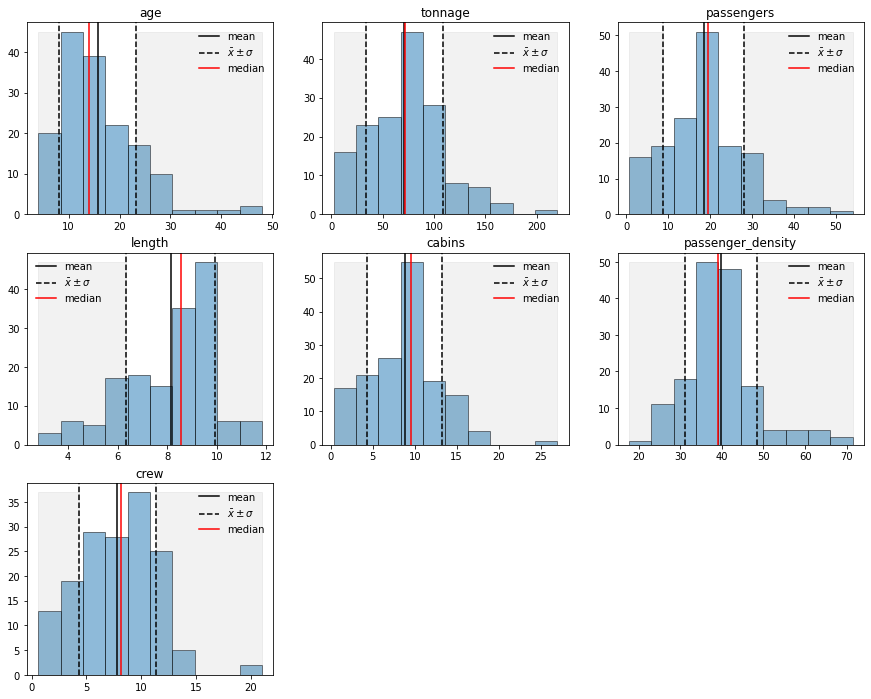

In [34]:
#df.hist()
labels = ['age','tonnage','passengers','length','cabins','passenger_density','crew']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
k = 0
for i in range(3):
    for j in range(3):
        if i == 2 and j >= 1:
            ax[i,j].axis('off')
            continue
        ax[i,j].axvline(df[f'{labels[k]}'].mean(),color='black',label='mean')
        ax[i,j].axvline(df[f'{labels[k]}'].mean() + df[f'{labels[k]}'].std(),color='black',label=r'$\bar{x} \pm \sigma$',ls = '--')
        ax[i,j].axvline(df[f'{labels[k]}'].mean() - df[f'{labels[k]}'].std(),color='black',ls = '--')
        y, _, _ = ax[i,j].hist(df[f'{labels[k]}'],edgecolor='black',alpha=0.5)
        ax[i,j].fill_between((df[f'{labels[k]}'].min(),df[f'{labels[k]}'].mean() - df[f'{labels[k]}'].std()),y.max(),color='gray',alpha=0.1)
        ax[i,j].fill_between((df[f'{labels[k]}'].mean() + df[f'{labels[k]}'].std(),df[f'{labels[k]}'].max()),y.max(),color='gray',alpha=0.1)
        ax[i,j].axvline(df[f'{labels[k]}'].quantile(q=0.5),color='red',label='median')
        ax[i,j].set_title(f'{labels[k]}')
        ax[i,j].legend(frameon=False)
        k += 1
plt.show()

Los siguientes apuntes se daran sin conocer las unidades de los datos.

- Los cruceros paracen ser en su gran mayoría "jovenes", menores a 25 años aproximadamente. Si suponemos que lo datos fueron entregados en este 2022, la gran mayoría de cruceros fueron fabricados (o en operación) entre (1997,2012). Sin embargo, algunos de ellos son realmente viejos, de 50 años por ejemplo, es decir, farbicados (o en operación) desde 1972.
- Los cruceros suelen llevar entre 25 a 100 de *tonnage*. Hay alrededor de 2 o 1 que llegan a llevar alrededor de 200.
- El número de pasajeros más común por crucero, es alrededor de $\sim 20\times 10^{2}$. El rango normal de pasajeros por crucero esta entre (5,25)$\times 10^{2}$. Son muy pocos los cruceros que llevan más de $\sim 40 \times 10^{2}$ pasajeros.
- La tendencia en el tamaño de los cruceros, es que principalmente sea grande. Tiene sentido, ente más grande, más espacio.
- La cantidad de cabinas pareser estar en una relación 1:2 con respecto a los pasajeros. Lo que indica que principalmente las cabinas son para parejas.
- La cantidad de *crew* parece estar en una relación 1:2 con respecto a los pasajeros, es un poco extraño me parece muy poco personal porque debemos quitarle los que se encargan de la limpiesa y el pilotaje del crucero. Muy pocos guardias y empleados de servicios.

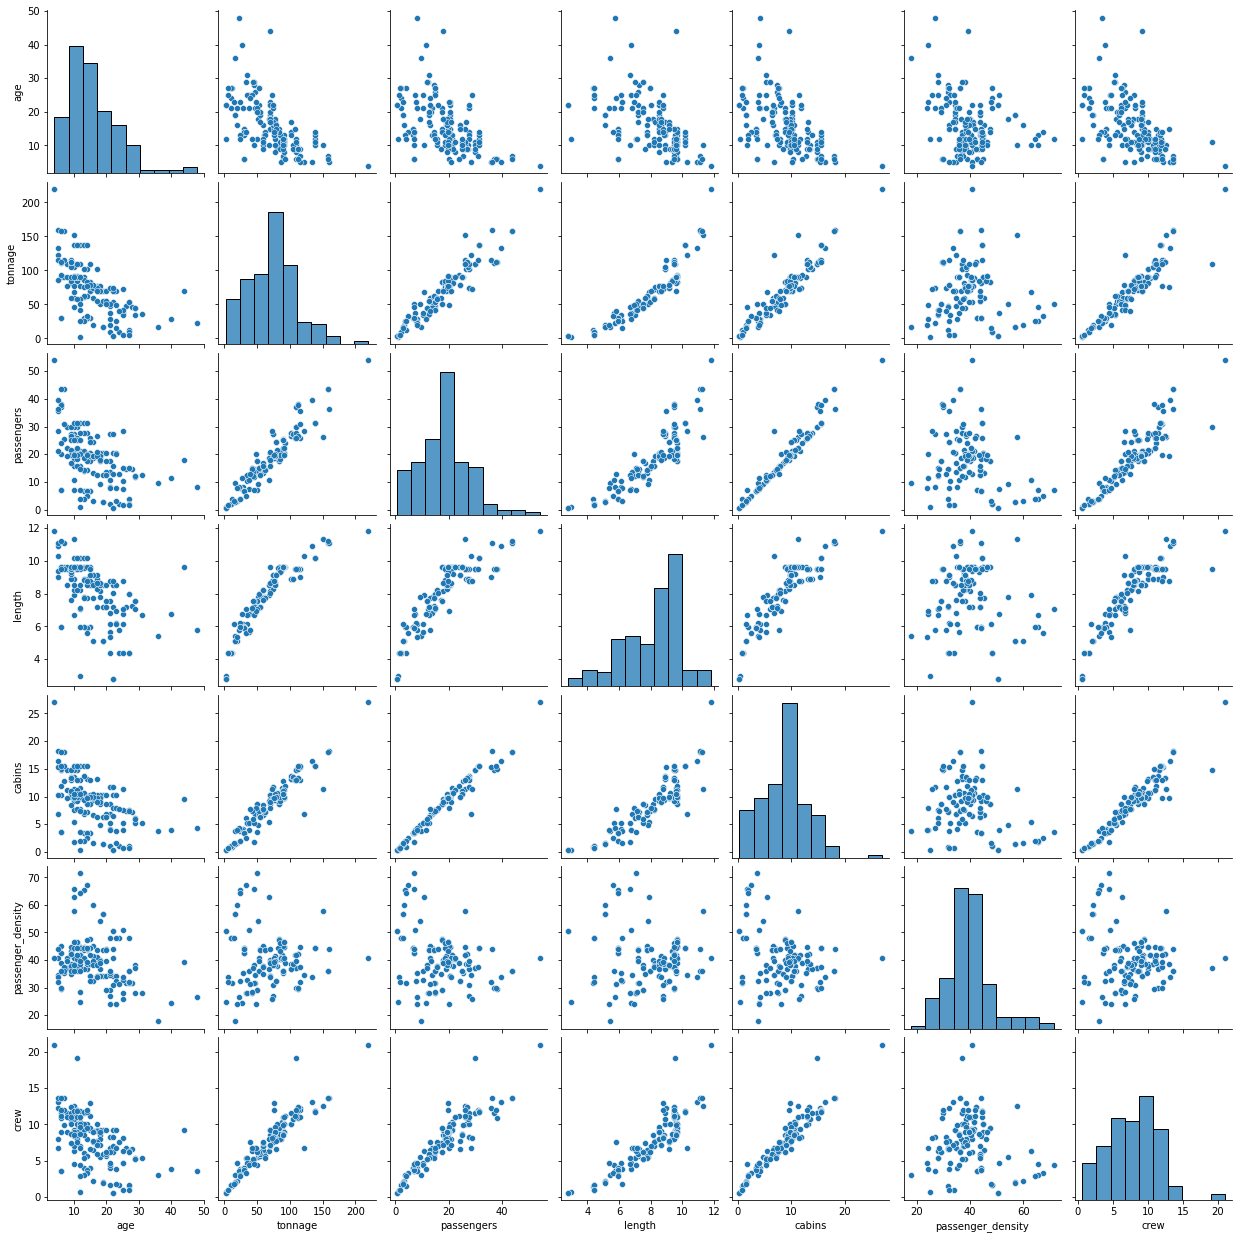

In [35]:
sns.pairplot(df,diag_kws = {'bins':10})

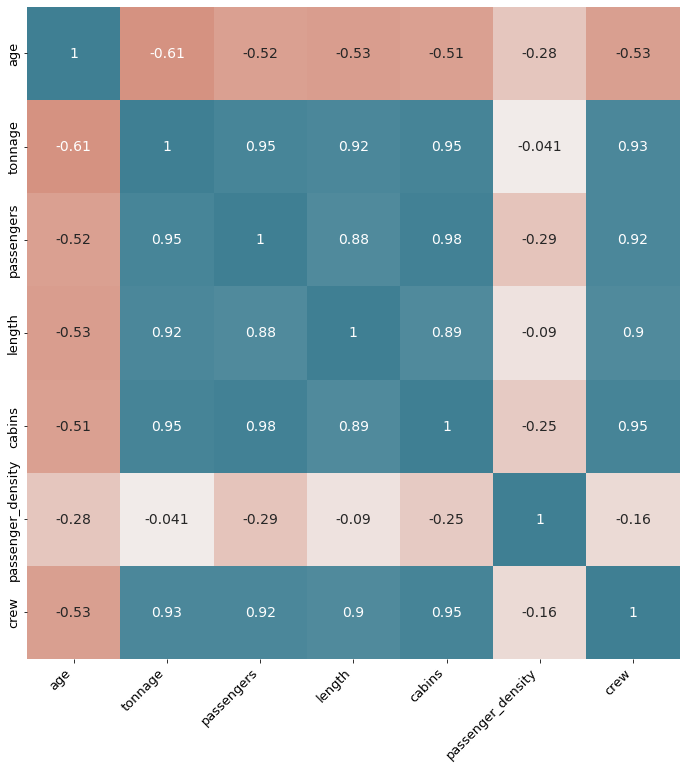

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

# Seaborn permite hacer mapas de calor dada una matriz de correlación-
sns.heatmap(
    df.corr(method='pearson'),
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 14},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 13)

Las dos gráficas anteriores son muy significativas, nos dan un visión introductoria a los pasos siguientes que podemos revisar. Algunas conclusiones o resultados interesantes y clarificantes a partir de ellas son las siguientes:

- *crew* presenta alta correlación positiva con *cabins*, *lenght*, *passengers* y *tonnage*.
- *crew* presenta correlación negativa con *age*.
- *crew* no presenta correlación con *passenger_density*. Esto es curisoso y un poco raro.

Con respecto a las correlaciones positivas para todoas encuentre sentido, menos para la que existe entre *tonnage* y *crew*. Esto es porque, dado mis nulos conocimiento en cruceros, tiene sentido en primer lugar que entre más espacio haya para tonelaje más espacio hay para pasajeros, sin embargo, no creo que un buque de carga de mercancias pueda convertirse en un crusero. En el contexto bajo el cual estamos trabajando, tendría más sentido si la correlación que presentara y la tendencia fuese negativa, es decir si para un volumen fijo el número de pasajeros crece y espacio disponible para tonelaje debería disminuir, en caso de que en el mismo crusero se transporte pasajeros y mercancias al tiempo. 
Por esta razón, a pesar de que presentan una alta correlacción, por contexto considero que está erroneo. 

<center>
<img src="https://raw.githubusercontent.com/jurados/tusdatos_co/main/assets/tonnage_vs_crew.png">
</center>

La relación entre *age* y *crew* tiene un poco de sentido, entre más viejo sea el crusero menos atrativo es para los pasajeros. Acá en un futuro sería interensate contrastar esto de la *age* con costos de crusero y renombre.

Lo que me sorprende en gran medida es la poca relación con *passanger_density*, pensaría que el tamaño de la *crew* estaría directamente relacionada con la densidad de pasajeros, ya que como denote en el punto anterior la definición de *passanger_density* se tiene $\text{passanger density} \propto \text{passenger} \propto \text{crew}$. Un análisis mas detallado de este problema se deja como trabajo a futuro. Por el momento, eliminaremos esa variables.

In [37]:
# Eliminamos las dos columnas anteriormente seleccionadas.
df.drop(['tonnage','passenger_density'],inplace=True,axis=1)
df.head()

,ship_name,cruise_line,age,passengers,length,cabins,crew
0,Journey,Azamara,6,6.94,5.94,3.55,3.55
1,Quest,Azamara,6,6.94,5.94,3.55,3.55
2,Celebration,Carnival,26,14.86,7.22,7.43,6.70
3,Conquest,Carnival,11,29.74,9.53,14.88,19.10
4,Destiny,Carnival,17,26.42,8.92,13.21,10.00


Las dos unicas variables que son "categoricas" son *ship_name* y *cruise_line*, para desarrollar el [one-hot encoding](https://en.wikipedia.org/wiki/One-hot).

In [38]:
df = pd.get_dummies(df,columns=['ship_name','cruise_line'],prefix='',prefix_sep='',drop_first=True) 
df.head()

,age,passengers,length,cabins,crew,Allegra,Amsterdam,Arcadia,Aries,Armonia,...,Oceania,Orient,P&O,Princess,Regent_Seven_Seas,Royal_Caribbean,Seabourn,Silversea,Star,Windstar
0,6,6.94,5.94,3.55,3.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,6.94,5.94,3.55,3.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,14.86,7.22,7.43,6.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,29.74,9.53,14.88,19.10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,26.42,8.92,13.21,10.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Crearemos los subconjutos para los datos de entrenamiento y los datos de prueba a partir del dataset original, con una relación 0.6:0.4 respectivamente.

In [39]:
train_data = df.sample(frac=0.6,random_state=0) # Datos de entrenamiento
test_data  = df.drop(train_data.index)          # Datos de prueba

Comprobaremos si los subconjuntos antriores quedaron bien separados en los correspondientes porcentajes. Para verificar esto nos valdremos de la cantidad de filas que tiene nuestro arreglo incial y verificaremos para esto la cantidad de las filas de los subconjutos.

In [40]:
print('La cantidad total de filas:',df.shape[0])
print('El 60% de los datos correspondería a',df.shape[0]/100*60,'filas')
print('La cantidad total de filas de los datos entrenados son:',train_data.shape[0])
print('El 40% de los datos correspondería a',df.shape[0]/100*40,'filas')
print('La cantidad total de filas de los datos de pruebas son:',test_data.shape[0])

La cantidad total de filas: 158
El 60% de los datos correspondería a 94.80000000000001 filas
La cantidad total de filas de los datos entrenados son: 95
El 40% de los datos correspondería a 63.2 filas
La cantidad total de filas de los datos de pruebas son: 63


In [41]:
# Generamos las etiquetas y los datos a entrenar
y_train = train_data.pop('crew')
X_train = train_data

# Generamos las etiquetas y los datos que serviran como prueba de nuestro modelo
y_test = test_data.pop('crew')
X_test = test_data

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y_test,y_pred)) # Si y_test y y_pred son muy cercanos, es decir, el error es cercano a 0, es muy buen ajuste.
r2    = model.score(X_train,y_train) 
print('El error es:',error)
print('El valor de R^2 es:',r2)

El error es: 5.0290618877877815
El valor de R^2 es: 1.0


El valor de $R^{2}$ es 1, no es posible dado que el error no es 0. Debe existir posiblemente una relación uno a uno.

In [44]:
#train_data.corr(method='pearson')
#test_data.corr(method='pearson')

#test_data.corrwith(train_data)

# Los coeficientes de Pearson

#from scipy.stats import pearsonr

#r_train, _ = pearsonr(y_train[:len(y_pred)],y_pred)
#r_test, _  = pearsonr(y_test,y_pred)

#print('El coeficiente de Pearson para los datos de entrenamiento con respeto a los predichos es:',r_train)
#print('El coeficiente de Pearson para los datos de prueba con respeto a los predichos es:',r_test)


labels = ['age','passengers','length','cabins']

print('Algunos de los coeficientes de correlación de Perason para los datos de entrenamiento son')
for label in labels:
    #print(f'{label}: ',train_data.corrwith(y_train,method='pearson')[f'{label}'])
    print(f'{label}: ',train_data.corrwith(pd.Series(y_pred),method='pearson')[f'{label}'])
print()
print('Algunos de los coeficientes de correlación de Perason para los datos de prueba son')
for label in labels:
    #print(f'{label}: ',test_data.corrwith(y_test,method='pearson')[f'{label}'])
    print(f'{label}: ',test_data.corrwith(pd.Series(y_pred),method='pearson')[f'{label}'])

Algunos de los coeficientes de correlación de Perason para los datos de entrenamiento son
age:  0.021458453449309692
passengers:  -0.2290987010262319
length:  -0.03258395988427627
cabins:  -0.2172041071250543

Algunos de los coeficientes de correlación de Perason para los datos de prueba son
age:  -0.252417912722857
passengers:  0.04677065148668514
length:  0.04518872101029612
cabins:  0.0685624570600479


Como se propuso usar en primera instancia un modelo simple de regresión lineal (*LinearRegression*) los siguientes son los hiperparametros del modelo. 

In [45]:
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


Una descripción de los hiperpárametros es:

- *copy_X*: No sobreescribe los valores de los parámetros en la matriz X.
- *fit_intercept*: Es necesario calcular el coeficiente libre de la regresión.
- *n_jobs*: Indica cuantos procesos se deben realizar mientras se cálculan los resultados.
- *normalize*: Va a desaparecer.
- *positive*: Obliga a todos los coeficiente a ser positivos.

In [46]:
model = LinearRegression(positive=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) 
r2    = model.score(X_train,y_train) 
print('El error es:',error)
print('El valor de R^2 es:',r2)
print(model.get_params())

El error es: 3.464131332431459
El valor de R^2 es: 0.9990897603557273
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': True}


Después de una corta revisión de los posibles hiperparámetros anteriores, el único que podría cambiar que "mejoraría" los resultados, es forzar a que todos los coeficientes sean positivos, pero esto podría ser un gran problema, principalmente con respecto a la variable *age*.

> Todo lo que desarrollaré en la siguientes secciones, lo he estado leyendo recientemente.

Se define la regulación como el método por el cuál se realiza una "penalización" automatica en las características que será usada en un modelo. Esto permite mejorar la presición (varianza) sacrificando un poco la exactitud (sesgo). A su vez, esto permite evitar situaciones de *overfitting* (buen desempeño en los datos de entrenamiento pero malo en los datos de prueba) o *underfitting* (mal desempeño tanto en los datos de entrenamiento como en los datos de prueba)

Para entender un poco mejor qué es la regularización, debemos partir de lo que conocemos como el método de la raíz de la suma cuadrada o RSS por sus siglas en inglés, para el calculo de la minimización del error, enfocado en el modelo usado anteriormente, la regresión lineal.

$$\text{RSS} = \sum_{i=1}^{N} \left(y_{i} - \hat{y}_{i}\right)^{2} = \sum_{i=1}^{N} \left(y_{i} - \beta_{0} - \sum_{j=1}^{p} \beta_{j}x_{ij}\right)^{2}$$

El método de Lasso (L1) uno de los tres métodos básicos más conocidos para casos de regularización (optimización). Este método penaliza aquellos parámetros que no sean significativos a través de un valor absoluto sobre los coeficientes obtenidos a través de la regresión, permitiendo entonces descartar las varibles que no aportan mucho al modelo. 

La forma matemática de ver esto es la siguientes

$$\text{RSS}^{\text{L}} = \sum_{i=1}^{N}{\left(y_i - \beta_{0} - \sum_{j=1}^p{\beta_{j}}x_{ij}\right)^2 + \color{blue}{\lambda \sum_{j=1}^{p}\left| \beta_j \right|}}$$

donde la parte azul de la ecuación anterior, corresponde a la penalización. El objetivo es encontrar el valor de $\lambda$ que minimice toda esa expresión. Debemos notar que entre más grande sea el valor de $\lambda$ más pequeños se deben hacer los $\beta_{j}$

In [47]:
from sklearn.linear_model import Lasso 

model_lasso = Lasso(alpha=0.02).fit(X_train,y_train)
predict_lasso = model_lasso.predict(X_test)
y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) 
r2    = model_lasso.score(X_train,y_train) 
print('El error es:',error)
print('El valor de R^2 es:',r2)
print(model_lasso.get_params())

El error es: 3.464131332431459
El valor de R^2 es: 0.958934090948521
{'alpha': 0.02, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


Vemos una mejoría en el desarrollo de la predicción, especialmente para el parámetro de $R^{2}$.

Los hiperparámetros en este modelo son:

- *alpha*: Correpondiente al valor del lambda que trata de minimizar el error.
- *copy_X*: Misma descripción que en método LinearRegression.
- *fit_intercept*: Misma descripción que en método LinearRegression.
- *max_iter*: Número máximo de iteracciones para llegar al resultado.
- *normalize*: Misma descripción que en método LinearRegression.
- *positive*: Misma descripción que en método LinearRegression.
- *precompute*: Funciona si se tiene una prematriz ya análisada, lo que ayudaría a acelerar los cálculos.
- *random_state*: Semilla del pseudo-generador de números aleatorios que funcióna para actualizar algun parámetro.
- *selection*: 
- *tol*: Que tanto tolera el modelo para aprobar o desaprobar una actualización en el coeficiente de un parámetro.
- *warm_start*: Sirve para seleccionar si usa o no usa las caracteristicas actulizadas en el paso anterior. 

Lo que debería cambiar para mejorar los resultados, es aumentar el valor de alpha y, en este caso particular, disminuir el número de iteraciones, las variables siguen una muy buena tendencia a simple vista.

In [48]:
# Acá podemos ver la lista de los parámetros que no aportan mucha significancia a nuestro modelo, los que tiene por coeficiente cero, según la regularización LASSO.
after_lasso = sorted(zip(X_train.columns, model_lasso.coef_), key=lambda x: x[1])

In [49]:
alpha_list = np.linspace(1,100,100)

#labels = ['age','passengers','length','cabins']

age_train, passengers_train, length_train, cabins_train = [], [], [], []
age_test, passengers_test, length_test, cabins_test = [], [], [], []

for alpha in alpha_list:
    model_lasso = Lasso(alpha=alpha).fit(X_train,y_train)
    predict_lasso = model_lasso.predict(X_test)
    y_pred = model.predict(X_test)

    #r_train, _ = pearsonr(y_train[:len(y_pred)],y_pred)
    #r_test, _  = pearsonr(y_test,y_pred)
    
    #pearsons_train_list.append(r_train)
    #pearsons_test_list.append(r_test)
    
    r_train = train_data.corrwith(pd.Series(y_pred),method='pearson')
    r_test  = test_data.corrwith(pd.Series(y_pred),method='pearson')

    age_train.append(r_train[0])
    passengers_train.append(r_train[1])
    length_train.append(r_train[2])
    cabins_train.append(r_train[3])
    
    age_test.append(r_test[0])
    passengers_test.append(r_test[1])
    length_test.append(r_test[2])
    cabins_test.append(r_test[3])

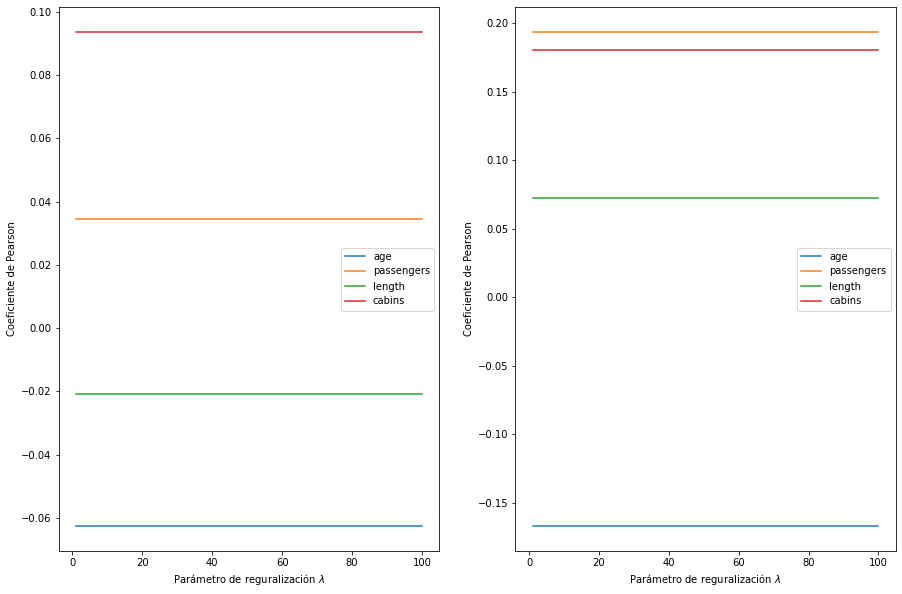

In [50]:
fig, ax = plt.subplots(ncols=2, figsize=(15,10))

ax[0].plot(alpha_list,age_train,label='age')
ax[0].plot(alpha_list,passengers_train, label='passengers')
ax[0].plot(alpha_list,length_train, label='length')
ax[0].plot(alpha_list,cabins_train, label='cabins')
ax[0].legend()
ax[0].set_xlabel(r'Parámetro de reguralización $\lambda$')
ax[0].set_ylabel('Coeficiente de Pearson')

ax[1].plot(alpha_list,age_test,label='age')
ax[1].plot(alpha_list,passengers_test, label='passengers')
ax[1].plot(alpha_list,length_test, label='length')
ax[1].plot(alpha_list,cabins_test, label='cabins')
ax[1].legend()
ax[1].set_xlabel(r'Parámetro de reguralización $\lambda$')
ax[1].set_ylabel('Coeficiente de Pearson')

plt.show()

In [51]:
# Acá elimino esas variables que segun el método de regulzación LASSO tienen poca relevancia
aux_after_lasso  = []
for element in after_lasso:
    if element[1] != 0:
        aux_after_lasso.append(element)
        
# Acá me quedo solo con los labels
vars_after_lasso = [element[0] for element in aux_after_lasso]
vars_after_lasso.append('crew')

train_data = df.sample(frac=0.6,random_state=0) # Datos de entrenamiento
test_data  = df.drop(train_data.index)          # Datos de prueba

# Acá selecciono solo las columnas que tienen significancia del dataset
# además elimino columnas repetidas.
train_data = train_data[train_data.columns.intersection(vars_after_lasso)]
train_data = train_data.loc[:, ~train_data.columns.duplicated()]

test_data = test_data[test_data.columns.intersection(vars_after_lasso)]
test_data = test_data.loc[:, ~test_data.columns.duplicated()]

['Royal_Caribbean', 'Holland_American', 'Costa', 'passengers', 'age', 'Celebrity', 'Virgo', 'length', 'Spirit', 'cabins', 'Star', 'Conquest', 'crew']


In [52]:
# Generamos las etiquetas y los datos a entrenar
y_train = train_data.pop('crew')
X_train = train_data

# Generamos las etiquetas y los datos que serviran como prueba de nuestro modelo
y_test = test_data.pop('crew')
X_test = test_data

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test)

error = np.sqrt(mean_squared_error(y_test,y_pred)) # Si y_test y y_pred son muy cercanos, es decir, el error es cercano a 0, es muy buen ajuste.
r2    = model.score(X_train,y_train) 
print('El error es:',error)
print('El valor de R^2 es:',r2)

El error es: 0.5294030438541639
El valor de R^2 es: 0.9663915719519142


Finalmente obtenemos un mejor modelo que recomienda el tamaño de la "tripulación" para los posibles compradores de barcos, teniendo en cuenta los siguientes parámetros. 

In [54]:
print(vars_after_lasso[:-1])

['Royal_Caribbean', 'Holland_American', 'Costa', 'passengers', 'age', 'Celebrity', 'Virgo', 'length', 'Spirit', 'cabins', 'Star', 'Conquest']


<center>
<h1> ¡ FIN ! </h1>
</cencter>